## ***Análise Exploratória***

In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc

from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.pyplot import legend
import matplotlib.ticker as mtick

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [71]:
df = pd.read_csv('https://raw.githubusercontent.com/diegocmr/bootcamp_ia/main/bootcamp-solicitacoescredito.csv')

In [24]:
df.shape

(8973, 38)

In [25]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8973 entries, 0 to 8972
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   numero_solicitacao           8973 non-null   int64  
 1   razaoSocial                  8973 non-null   object 
 2   nomeFantasia                 8973 non-null   object 
 3   cnpjSemTraco                 8973 non-null   object 
 4   maiorAtraso                  8973 non-null   int64  
 5   margemBrutaAcumulada         8973 non-null   float64
 6   percentualProtestos          7475 non-null   float64
 7   primeiraCompra               8867 non-null   object 
 8   prazoMedioRecebimentoVendas  8973 non-null   int64  
 9   titulosEmAberto              8973 non-null   float64
 10  valorSolicitado              8973 non-null   float64
 11  status                       8973 non-null   object 
 12  definicaoRisco               8973 non-null   object 
 13  diferencaPercentua

In [26]:
# Verificando a quantidade de valores únicos
df.nunique()

numero_solicitacao             8973
razaoSocial                    2759
nomeFantasia                   2677
cnpjSemTraco                   2829
maiorAtraso                     175
margemBrutaAcumulada           2145
percentualProtestos              10
primeiraCompra                 1950
prazoMedioRecebimentoVendas     180
titulosEmAberto                 761
valorSolicitado                 363
status                            7
definicaoRisco                    4
diferencaPercentualRisco         79
percentualRisco                  81
dashboardCorrelacao             701
valorAprovado                   326
dataAprovadoEmComite            558
periodoBalanco                  124
ativoCirculante                1794
passivoCirculante              1789
totalAtivo                     1788
totalPatrimonioLiquido         1759
endividamento                  1185
duplicatasAReceber             1668
estoque                        1674
faturamentoBruto               4288
margemBruta                 

In [27]:
# Identificando a quantidade de valores nulos
df.isnull().sum()

numero_solicitacao                0
razaoSocial                       0
nomeFantasia                      0
cnpjSemTraco                      0
maiorAtraso                       0
margemBrutaAcumulada              0
percentualProtestos            1498
primeiraCompra                  106
prazoMedioRecebimentoVendas       0
titulosEmAberto                   0
valorSolicitado                   0
status                            0
definicaoRisco                    0
diferencaPercentualRisco          0
percentualRisco                   0
dashboardCorrelacao               0
valorAprovado                  1404
dataAprovadoEmComite           8415
periodoBalanco                 4240
ativoCirculante                4240
passivoCirculante              4240
totalAtivo                     4240
totalPatrimonioLiquido         4240
endividamento                  4240
duplicatasAReceber             4240
estoque                        4240
faturamentoBruto                750
margemBruta                 

In [72]:
df['primeiraCompra'] = df.loc[df['primeiraCompra'].notnull(), 'primeiraCompra'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S').strftime('%d/%m/%Y'))
df['periodoBalanco'] = df.loc[df['periodoBalanco'].notnull(), 'periodoBalanco'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S').strftime('%d/%m/%Y'))
df['dataAprovadoNivelAnalista'] = df.loc[df['dataAprovadoNivelAnalista'].notnull(), 'dataAprovadoNivelAnalista'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S').strftime('%d/%m/%Y'))
df.head()

,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,...,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista
0,1,James Richardson-Patel,Alexandra Williams,KEBE17609492220843,0,0.252448,0.0,10/12/2015,0,0.00,...,12.0,0.0,2003.0,Acima de 17 anos,90000.0,False,True,1.0,43200.0,03/02/2020
1,2,Dr. Geoffrey Walsh,Mr. Darren Arnold,JRBK88908250677300,0,0.000000,NaN,12/06/2019,0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,3,Joanna Hudson,Dr. David Rees,GCVQ28531614261293,4,0.624777,0.0,27/11/2019,0,0.00,...,7.0,0.0,2014.0,De 6 a 10 anos,20000.0,False,True,1.0,4320.0,04/02/2020
3,4,Gordon Jones-Hopkins,Sara Reid-Robson,KJND32266018316396,20,0.000000,NaN,13/02/2017,0,0.00,...,12.0,0.0,2013.0,De 6 a 10 anos,30000.0,False,True,0.0,5920.0,04/02/2020
4,5,Nigel Lee,Dr. Stanley Duncan,CGQN15826802440348,20,0.454088,0.0,13/07/2010,20,1486.95,...,9.0,40680051.0,2002.0,Acima de 17 anos,75000.0,False,False,1.0,89000.0,04/02/2020


###Distribuição dos dados entre as variáveis independentes (features) e dependente (target)

In [29]:
# Função para gerar gráficos stripplot
# param1: nome do dataframe
# param2: variável do eixo X
# param3: variável do eixo Y
# param4: axis
# param5: label para gráfico
# param6: paleta de cores, default: Set2

def graf_stripplot(param1, param2, param3, param4, param5, param6='Set2'):
    sns.stripplot(data=param1, x=param2, y=param3,
                  ax=param4, hue=param2, palette=param6)
    param4.set_xlabel('')
    param4.set_ylabel('')
    param4.tick_params(labelsize=10)
    param4.yaxis.set_major_formatter(mtick.ScalarFormatter())
    param4.ticklabel_format(style='plain', axis='y')
    param4.set_title(param5, loc='right', fontsize=12)
    param4.legend()
    param4.set_xticklabels([])

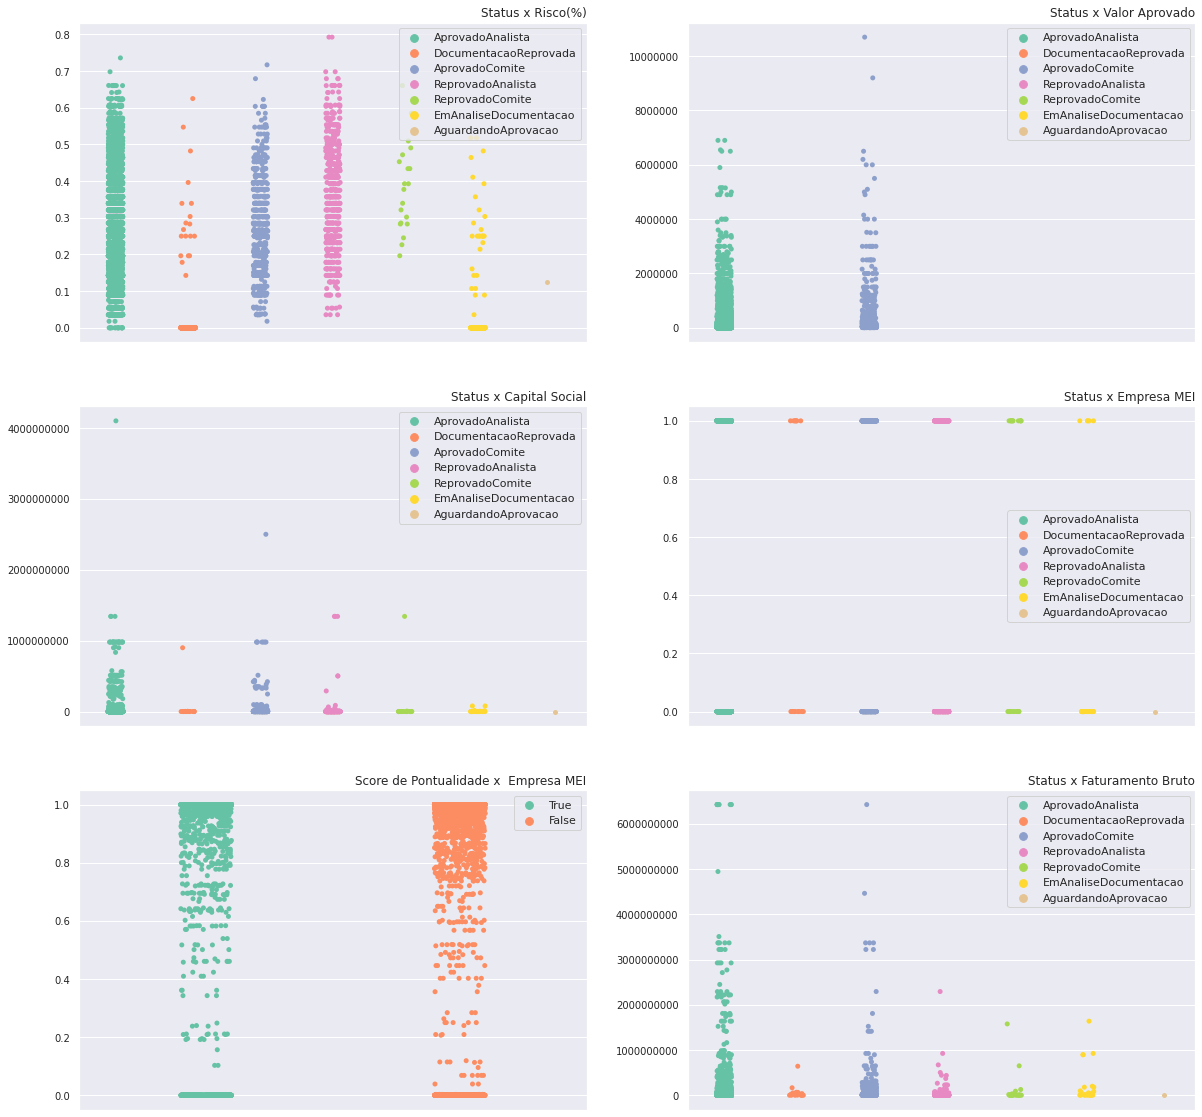

In [32]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))

graf_stripplot(df, 'status', 'percentualRisco', ax1,
                 'Status x Risco(%)')
graf_stripplot(df, 'status', 'valorAprovado', ax2,
                 'Status x Valor Aprovado')
graf_stripplot(df, 'status', 'capitalSocial', ax3,
                 'Status x Capital Social')
graf_stripplot(df, 'status', 'empresa_MeEppMei', ax4,
                 'Status x Empresa MEI')
graf_stripplot(df, 'empresa_MeEppMei', 'scorePontualidade',
                 ax5, 'Score de Pontualidade x  Empresa MEI')
graf_stripplot(df, 'status', 'faturamentoBruto', ax6,
                 'Status x Faturamento Bruto')

plt.show()

## Normalizando as colunas

In [73]:
# Status
df['status'] = df['status'].astype(str).str.strip()
df['status'] = df['status'].replace({'AprovadoAnalista': '0', 'AprovadoComite': '1', 'EmAnaliseDocumentacao': '2', 
                                     'AguardandoAprovacao': '3', 'DocumentacaoReprovada': '4', 'ReprovadoAnalista': '5', 
                                     'ReprovadoComite': '6'})

# Definição de Risco
df['definicaoRisco'] = df['definicaoRisco'].astype(str).str.strip()
df['definicaoRisco'] = df['definicaoRisco'].replace({'De 0 a 10 % - Muito Baixo': '0', 'De 11 a 30 % - Baixo': '1', 
                                             'De 31 a 50 % - Médio': '2', 'De 51 a 80 % - Alto': '3'})


# Intervalo de Fundação
df['intervaloFundacao'] = df['intervaloFundacao'].astype(str).str.strip()
df['intervaloFundacao'] = df['intervaloFundacao'].replace({'NaN': '0', 'nan': '0', 'De 0 a 5 anos': '1', 
                                                           'De 6 a 10 anos': '2', 'De 11 a 16 anos': '3', 'Acima de 17 anos': '4'})

# Restrições
df['restricoes'] = df['restricoes'].astype(str).str.strip()
df['restricoes'] = df['restricoes'].replace({'NaN': '0', 'nan': '0', 'False': '1', 'True': '2'})

# Se a empresa é MEI ou não
df['empresa_MeEppMei'] = df['empresa_MeEppMei'].astype(str).str.strip()
df['empresa_MeEppMei'] = df['empresa_MeEppMei'].replace({'NaN': '0', 'nan': '0', 'False': '1', 'True': '2'})

# Percentual de Protestos
df['percentualProtestos'] = df['percentualProtestos'].fillna(0)

selected_columns = ['status', 'definicaoRisco', 'intervaloFundacao', 'restricoes', 'empresa_MeEppMei', 'percentualProtestos']
selected_data = df.loc[:, selected_columns]

selected_data.head()

,status,definicaoRisco,intervaloFundacao,restricoes,empresa_MeEppMei,percentualProtestos
0,0,1,4,1,2,0.0
1,4,0,0,0,0,0.0
2,0,1,2,1,2,0.0
3,0,3,2,1,2,0.0
4,0,1,4,1,1,0.0


In [74]:
# Converter de volta para float e plotar o heatmap
df['status'] = df['status'].astype(float)
df['definicaoRisco'] = df['definicaoRisco'].astype(float)
df['intervaloFundacao'] = df['intervaloFundacao'].astype(float)
df['restricoes'] = df['restricoes'].astype(float)
df['empresa_MeEppMei'] = df['empresa_MeEppMei'].astype(float)

## Trabalhando a correlação entre as colunas

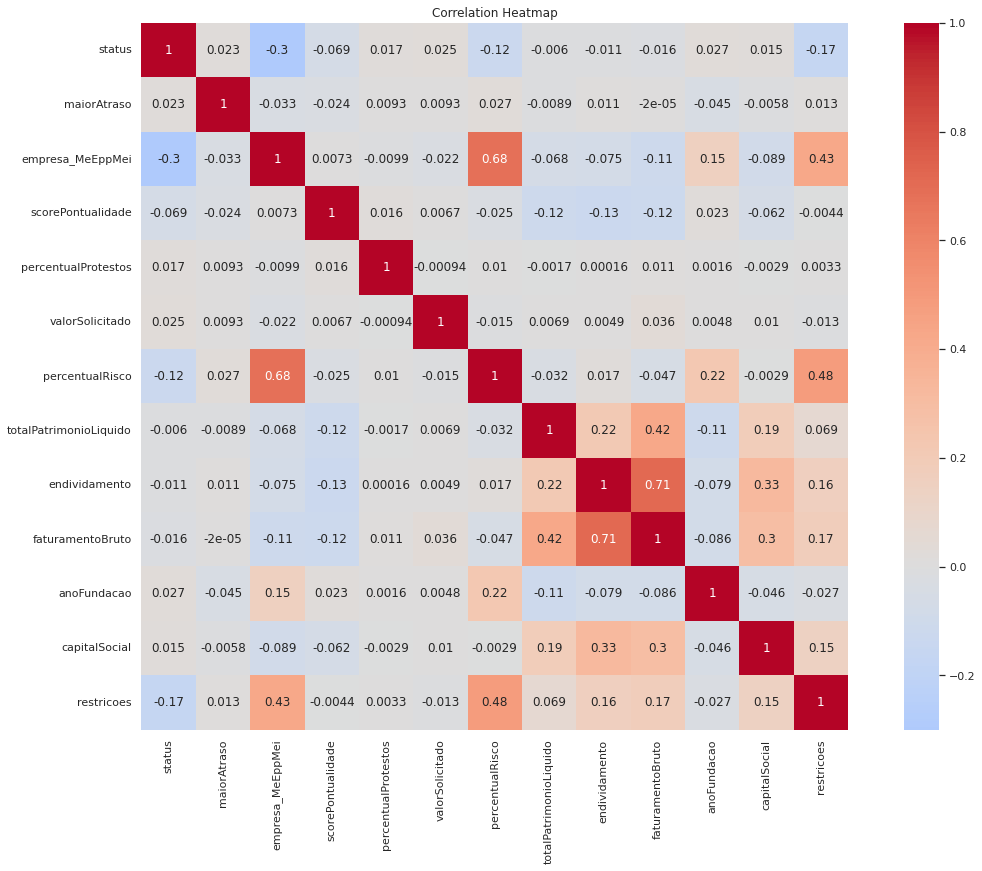

In [75]:
corr_matrix = df[['status', 'maiorAtraso', 'empresa_MeEppMei', 'scorePontualidade',  
           'percentualProtestos', 'valorSolicitado', 'percentualRisco', 'totalPatrimonioLiquido', 
           'endividamento', 'faturamentoBruto', 'anoFundacao', 'capitalSocial', 'restricoes']].corr()


plt.figure(figsize=(20, 13))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Heatmap')
plt.show()


In [87]:
corr_matrix.head()

,status,maiorAtraso,empresa_MeEppMei,scorePontualidade,percentualProtestos,valorSolicitado,percentualRisco,totalPatrimonioLiquido,endividamento,faturamentoBruto,anoFundacao,capitalSocial,restricoes
status,1.000000,0.023065,-0.299654,-0.068661,0.017419,0.025457,-0.122248,-0.005952,-0.011373,-0.016005,0.026806,0.015479,-0.167140
maiorAtraso,0.023065,1.000000,-0.033277,-0.024385,0.009300,0.009317,0.027167,-0.008907,0.011245,-0.000020,-0.045360,-0.005795,0.012730
empresa_MeEppMei,-0.299654,-0.033277,1.000000,0.007310,-0.009943,-0.021818,0.680187,-0.068284,-0.075101,-0.112296,0.149542,-0.089381,0.428590
scorePontualidade,-0.068661,-0.024385,0.007310,1.000000,0.015585,0.006724,-0.024876,-0.116172,-0.131162,-0.121612,0.023057,-0.062191,-0.004432
percentualProtestos,0.017419,0.009300,-0.009943,0.015585,1.000000,-0.000944,0.010003,-0.001741,0.000164,0.011134,0.001588,-0.002912,0.003263


ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte;

ρ = 0,7 a 09 (positivo ou negativo): correlação forte;

ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;

ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;

ρ = 0 a 0,3 (positivo ou negativo): não possui correlação.

In [97]:
highest_values = {}
for col in corr_matrix.columns:
    highest_values[col] = None
    highest_value = float('-inf')
    for row_idx, row in corr_matrix.iterrows():
      if row[col] > highest_value and row[col] != 1:
        highest_value = row[col]
        highest_values[col] = row_idx

df.highest_values = pd.DataFrame.from_dict(highest_values, orient='index')
print(df.highest_values.to_string())

                                       0
status                       anoFundacao
maiorAtraso              percentualRisco
empresa_MeEppMei         percentualRisco
scorePontualidade            anoFundacao
percentualProtestos               status
valorSolicitado         faturamentoBruto
percentualRisco         empresa_MeEppMei
totalPatrimonioLiquido  faturamentoBruto
endividamento           faturamentoBruto
faturamentoBruto           endividamento
anoFundacao              percentualRisco
capitalSocial              endividamento
restricoes               percentualRisco


##Padronização

In [ ]:
scaler = StandardScaler()
standardX = scaler.fit_transform(X)